## **What is feature scaling?**
It is a technique to standardize the independent features present in the data in a  fixed range.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **why we do need scaling?**

Feature scaling is important because it ensures that each feature in your dataset contributes equally to the machine learning model's performance, particularly when the features have different units or scales.

## **Standardization**

Also called as z-score Normalization

z= x−μ/σ

where new means is 0 and standardization is 1

In [33]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [34]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### **Train test splilt**

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((280, 2), (120, 2))

### **StandardScaler**

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


#transform tarin and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [38]:
x_train_scaled # get numpy array not data frame

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [39]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [40]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [41]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## **Effect of scaling**

Text(0.5, 1.0, 'After Scaling')

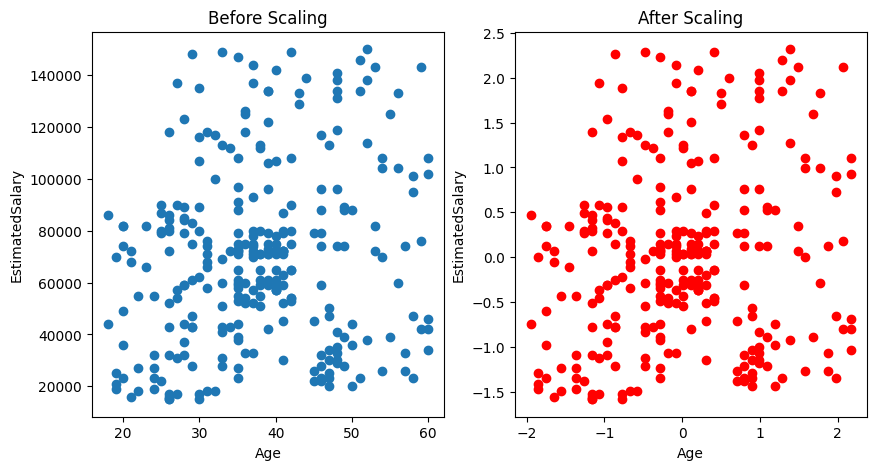

In [42]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('After Scaling')

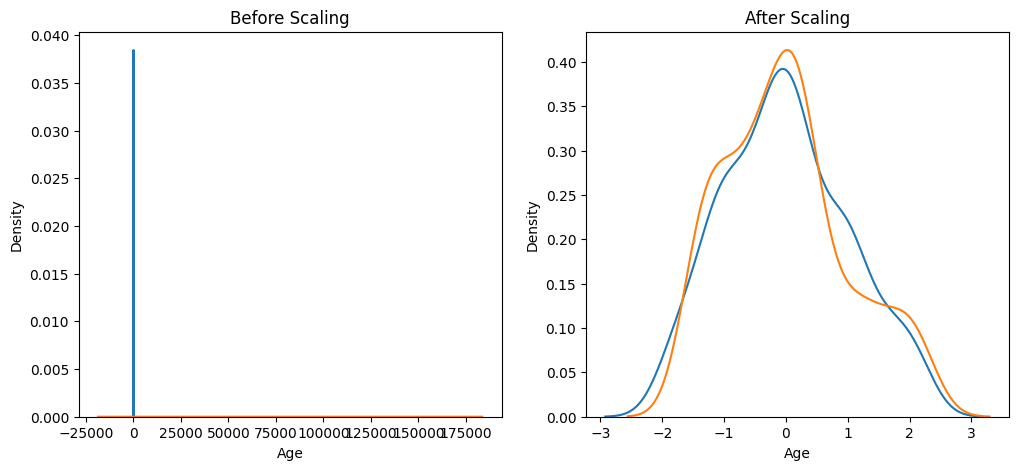

In [43]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1,legend=True)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

## **Comparison of Distributions**

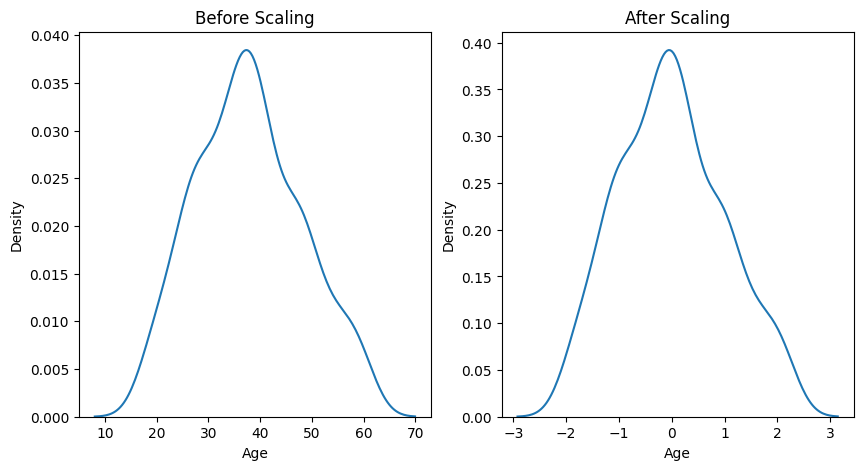

In [44]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()

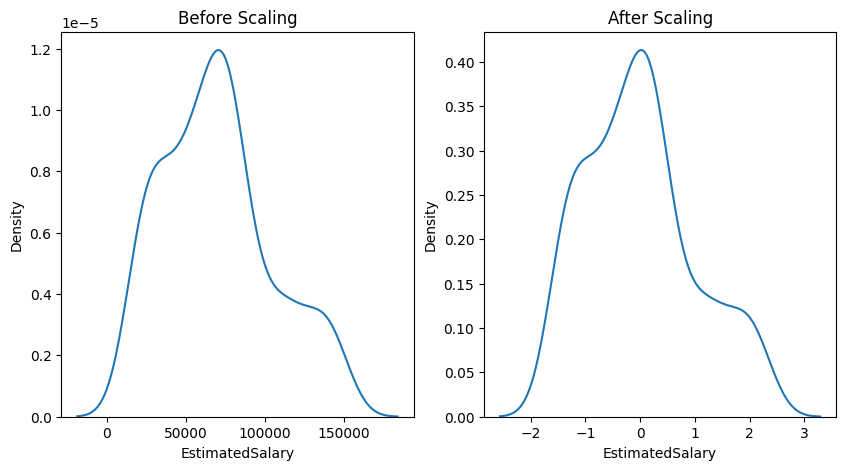

In [45]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

## **why scaling is important?**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


lr_scaled = LogisticRegression()
lr_scaled.fit(x_train_scaled,y_train)
y_pred_scaled = lr_scaled.predict(x_test_scaled)


In [50]:
print('Accuracy before scaling : ',accuracy_score(y_test,y_pred))
print('Accuracy after scaling : ',accuracy_score(y_test,y_pred_scaled))

Accuracy before scaling :  0.875
Accuracy after scaling :  0.8666666666666667


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(x_train_scaled,y_train)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [52]:
print('Accuracy before scaling : ',accuracy_score(y_test,y_pred))
print('Accuracy after scaling : ',accuracy_score(y_test,y_pred_scaled))

Accuracy before scaling :  0.875
Accuracy after scaling :  0.875


In [53]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


There is no effect of standardization on outlier data

when to use Standardization?
- K-Means - Use euclidean Distance measure
- KNN - Measure the distance between pairs of samples and these distances are influenced by the measurement units.
- PCA - Try to get the feature with maximum variance
- ANN - apply GD
- Gradient Descent - Theta calculation becomes faster after feature scaling and the learning rate in the update equation of SGD is the same for every parameter.